# CodeX Marketing Insights
This notebook analyzes survey data to provide insights for CodeX's energy drink marketing team. It addresses primary insights from the survey and uses Python to automate analysis. Secondary insights requiring external research are noted but not fully implemented due to lack of data.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from git import Repo

In [5]:
cities = pd.read_csv('./Dataset/dim_cities.csv')
respondents = pd.read_csv('./Dataset/dim_repondents.csv')
responses = pd.read_csv('./Dataset/fact_survey_responses.csv')

In [7]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City_ID  10 non-null     object
 1   City     10 non-null     object
 2   Tier     10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


There are about 10 entries in the data, 3 columns, and no missing values in any of the columns.

In [8]:
cities.isnull().sum()

City_ID    0
City       0
Tier       0
dtype: int64

In [9]:
respondents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


There are about 5 columns in the respondents dataset, with 10000 entries, and no missing values in all the columns.

In [11]:
respondents.isnull().sum()

Respondent_ID    0
Name             0
Age              0
Gender           0
City_ID          0
dtype: int64

In [12]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

This dataframe shows 23 columns, with 10,000 entries, and a combination of integer and object datatypes, with no missing values.

In [13]:
responses.isnull().sum()

Response_ID                       0
Respondent_ID                     0
Consume_frequency                 0
Consume_time                      0
Consume_reason                    0
Heard_before                      0
Brand_perception                  0
General_perception                0
Tried_before                      0
Taste_experience                  0
Reasons_preventing_trying         0
Current_brands                    0
Reasons_for_choosing_brands       0
Improvements_desired              0
Ingredients_expected              0
Health_concerns                   0
Interest_in_natural_or_organic    0
Marketing_channels                0
Packaging_preference              0
Limited_edition_packaging         0
Price_range                       0
Purchase_location                 0
Typical_consumption_situations    0
dtype: int64

In order to get information from all table, we have to carry out a table merge. First, between cities and respondents dataframe, and then later with responses.

In [17]:
# Merging respondents and cities using left merge
merged_df = respondents.merge(cities, on='City_ID', how='left')

In [24]:
merged_df.head()

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier
0,120031,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,120032,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,120033,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,120034,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
4,120035,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2


In [20]:
#Merging all dataframes to a single full dataframe so we can get information from all the dfs
full_df = merged_df.merge(responses, on='Respondent_ID', how='inner')

In [23]:
full_df.head()

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,120031,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2,103001,2-3 times a week,To stay awake during work/study,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,120032,Trisha Rout,19-30,Male,CT118,Pune,Tier 2,103002,2-3 times a month,Throughout the day,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,120033,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1,103003,Rarely,Before exercise,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,120034,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1,103004,2-3 times a week,To stay awake during work/study,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,120035,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2,103005,Daily,To stay awake during work/study,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


## Basic Analysis

Perform basic analysis to understand the distribution of age, gender, and city.

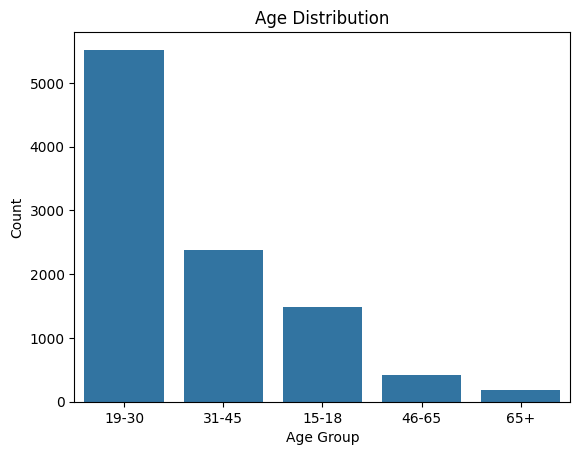

In [37]:
# Plot age distribution
sns.countplot(data=respondents, x='Age', order=respondents['Age'].value_counts().index)
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

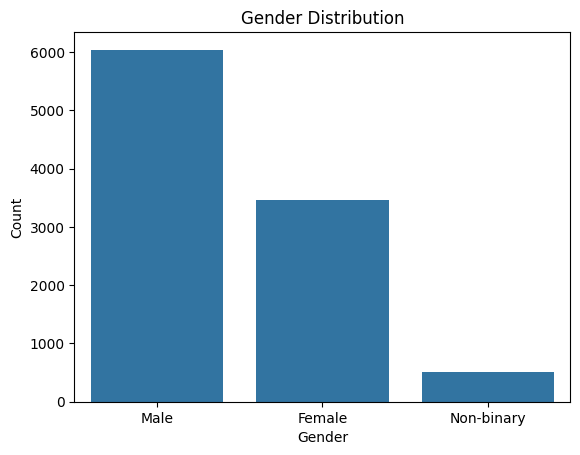

In [39]:
# Plot gender distribution
sns.countplot(data=respondents, x='Gender', order=respondents['Gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

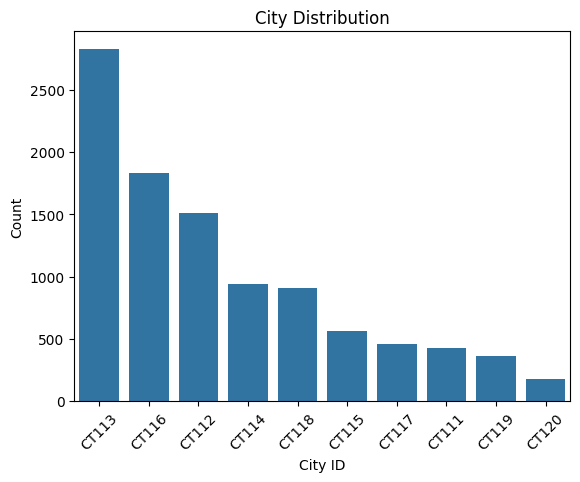

In [59]:
# Plot city distribution
sns.countplot(data=respondents, x='City_ID', order=respondents['City_ID'].value_counts().index)
plt.title('City Distribution')
plt.xlabel('City ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

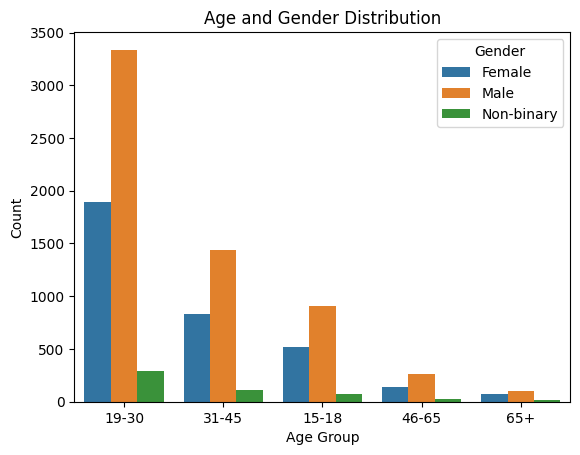

In [49]:
# Plot age and gender distribution
sns.countplot(data=respondents, x='Age', hue='Gender', order=respondents['Age'].value_counts().index)
plt.title('Age and Gender Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

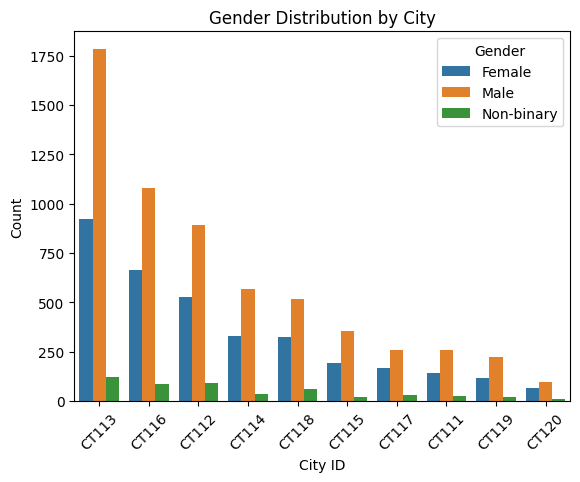

In [50]:
# Plot gender distribution by city
sns.countplot(data=respondents, x='City_ID', hue='Gender', order=respondents['City_ID'].value_counts().index)
plt.title('Gender Distribution by City')
plt.xlabel('City ID')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

### Competitor Analysis

To answer the question about who the current market leaders are, we have to look at the column Current_brands.

In [118]:
full_df.groupby('Current_brands')['Respondent_ID'].count()

Current_brands
Bepsi        2112
Blue Bull    1058
CodeX         980
Cola-Coka    2538
Gangster     1854
Others        479
Sky 9         979
Name: Respondent_ID, dtype: int64

The current market leader is Cola-Coka.

In [119]:
full_df[full_df.Current_brands.isin(['Cola-Coka'])][['Current_brands', 'Reasons_for_choosing_brands']].groupby('Reasons_for_choosing_brands').count()

,Current_brands
Reasons_for_choosing_brands,
Availability,510
Brand reputation,616
Effectiveness,433
Other,448
Taste/flavor preference,531


The above code filters out only information about Cola-Coka, since we already know it to be the current brand leader. Then the highest reasons for choosing the brand if for "Brand Reputation"

### Marketing Channels and Brand Awareness

In [101]:
full_df.Marketing_channels.unique()

array(['TV commercials', 'Print media', 'Online ads', 'Other',
       'Outdoor billboards'], dtype=object)

There are about 5 choice of channels in the questionnaire. But we want to know which marketing channel can be used to reach more customers.

In [108]:
full_df.groupby('Marketing_channels')['Respondent_ID'].count()

Marketing_channels
Online ads            4020
Other                 1225
Outdoor billboards    1226
Print media            841
TV commercials        2688
Name: Respondent_ID, dtype: int64

About 4020 respondents do often come across energy drink advertisements via Online Ads, and this seem to be the highest marketing channels.

Just to verify, lets check confirm if the current market leader uses Online Ads for marketing.

In [121]:
online_ads_count = full_df[full_df['Marketing_channels'] == 'Online ads'].groupby('Current_brands').size().reset_index(name='Online_Ads_Count')
online_ads_count

,Current_brands,Online_Ads_Count
0,Bepsi,844
1,Blue Bull,425
2,CodeX,411
3,Cola-Coka,1001
4,Gangster,772
5,Others,191
6,Sky 9,376


Cola-Coka rely so much on online ads, and this seem to be an effective marketing channel to reach more customers - Online Ads